In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# OList Dataset

## Overview

> This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

> This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Notes

- An order might have multiple items.
- Each item might be fulfilled by a distinct seller.
- All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

### References
- https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
- Data architecture: https://imgur.com/HRhd2Y0

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Dataset directory

DATASET_PATH = './data/olist'

dataset_fnames = os.listdir(DATASET_PATH)

## Exploring data

In [4]:
def summarize(df):
    print(df.info())
    print('\n\n---\n\n')
    print(f'Nulls:\n{df.isnull().sum()}')

In [5]:
for fname in dataset_fnames:
    print('*'*len(fname))
    print(fname)
    print('*'*len(fname)+'\n')
    df = pd.read_csv(DATASET_PATH+'/'+fname)
    summarize(df)
    print('\n\n\n')
    del df

***************************
olist_customers_dataset.csv
***************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


---


Nulls:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64




*****************************
olist_geolocation_dataset.csv
*****************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5

## Tasks

- Preprocess the data, fill in missing values whenever possible
- Explore the reliability of the data, are all of them trustworthy?
- Analyze the data for outliers, skewness, and other anomalies
- Answer the questions below (you can come up with your own questions)

### Questions

- Customer Acquisition and Demographics:

    1. How many unique customers are there in the dataset?
    2. What are the top 5 cities with the most customers?
    3. What is the top 5 state with the highest customer spending?

- Order Patterns and Behavior:

    4. What is the distribution of order statuses?
    5. Calculate the average order value for each customer.
    6. Find the customer who has spent the most money across all their orders.
    7. Identify any seasonal trends in order volume by analyzing the order_purchase_timestamp.

- Product Analysis:

    8. Identify the top 10 product categories by total sales value.
    9. Analyze the relationship between product description length and sales.
    10. Find the correlation between product weight and shipping cost (freight_value).

- Seller Performance:

    11. Which seller has the highest number of orders?
    12. Calculate the average order processing time (time between order_purchase_timestamp and order_approved_at) for each seller.
    13. Create a geospatial visualization of seller locations and compare with customer locations.

- Shipping and Logistics:

    14. Calculate the average time between order placement and delivery for completed orders.
    15. Calculate the percentage of orders that were delivered earlier than the estimated delivery date.

- Payment Analysis:

    16. What is the most common payment type, and does it vary by state?
    17. Identify products with the highest profit margin (assuming profit is the difference between price and freight_value).

- Customer Satisfaction and Retention:

    18. What is the average review score for each product category?
    19. Analyze the relationship between review scores and order processing time.
    20. Create a cohort analysis to see how customer retention rates change over time.




### Q1

In [21]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [94]:
df_cust = pd.read_csv("D:\Documents\Tuitor\Data\olist\olist_customers_dataset.csv")
# df_cust["customer_unique_id"].nunique()
# df_cust["customer_unique_id"].isna().value_counts()

df_cust

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [30]:
df_cust["customer_city"]

0                       franca
1        sao bernardo do campo
2                    sao paulo
3              mogi das cruzes
4                     campinas
                 ...          
99436                sao paulo
99437          taboao da serra
99438                fortaleza
99439                   canoas
99440                    cotia
Name: customer_city, Length: 99441, dtype: object

In [35]:
df_cust.groupby("customer_city")["customer_unique_id"].nunique().sort_values(ascending=False).head(5)

customer_city
sao paulo         14984
rio de janeiro     6620
belo horizonte     2672
brasilia           2069
curitiba           1465
Name: customer_unique_id, dtype: int64

In [39]:
df_order = pd.read_csv("D:\Documents\Tuitor\Data\olist\olist_orders_dataset.csv")
df_payment = pd.read_csv("D:\Documents\Tuitor\Data\olist\olist_order_payments_dataset.csv")

In [40]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# df_payment[df_payment["order_id"] == "d3f44296d90a42d3ec4b52b18654e87a"]
# df_payment["payment_type"].value_counts()

In [44]:
# df_order["order_status"].value_counts()
df_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [115]:
df_join = pd.merge(df_cust, df_order, on="customer_id", how="outer")
df_join

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04 00:00:00
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04 00:00:00
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22 00:00:00
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14 00:00:00
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,e5794df8573fa179a90a7b797fc4b71f,95630,parobe,RS,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27 00:00:00
99437,fffeda5b6d849fbd39689bb92087f431,afbb5a642107cf6bb1ca68e863175f03,22461,rio de janeiro,RJ,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29 00:00:00
99438,ffff42319e9b2d713724ae527742af25,680213db6ebd9e4f24d03280cbe10346,6754,taboao da serra,SP,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25 00:00:00
99439,ffffa3172527f765de70084a7e53aae8,48fd7dec70f2b104a1d5e8c5c639102b,37130,alfenas,MG,d0e7be325a1c986babc4e1cdb91edc03,delivered,2017-09-02 11:53:32,2017-09-02 12:05:40,2017-09-08 20:04:11,2017-09-14 19:47:40,2017-09-26 00:00:00


In [116]:
df_join = pd.merge(df_join, df_payment, on="order_id", how="outer")

In [86]:
df_join[df_join['order_status'] == "delivered"].groupby("customer_state")["payment_value"].sum().sort_values(ascending=False).head(5)
# df_join.groupby("customer_state")["order_status"].nunique()


customer_state
SP    5770266.19
RJ    2055690.45
MG    1819277.61
RS     861802.40
PR     781919.55
Name: payment_value, dtype: float64

### Q2

In [91]:
(df_order["order_status"].value_counts()/df_order["order_status"].count()) * 100

order_status
delivered      97.020344
shipped         1.113223
canceled        0.628513
unavailable     0.612423
invoiced        0.315765
processing      0.302692
created         0.005028
approved        0.002011
Name: count, dtype: float64

In [96]:
'''
average order value = total value payment / order count
''' 
df_join

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
1,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
2,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
3,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
4,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103882,b51593916b4b8e0d6f66f2ae24f2673d,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,fffc94f6ce00a00581880bf54a75a037,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1.0,boleto,1.0,343.40
103883,84c5d4fbaf120aae381fad077416eaa0,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,fffcd46ef2263f404302a634eb57f7eb,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1.0,boleto,1.0,386.53
103884,29309aa813182aaddc9b259e31b870e6,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,fffce4705a9662cd70adb13d4a31832d,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1.0,credit_card,3.0,116.85
103885,b5e6afd5a41800fdf401e0272ca74655,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,fffe18544ffabc95dfada21779c9644f,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1.0,credit_card,3.0,64.71


In [101]:
df_join.groupby("customer_id")["payment_value"].sum()/df_join.groupby("customer_id")["order_id"].count()

customer_id
00012a2ce6f8dcda20d059ce98491703    114.74
000161a058600d5901f007fab4c27140     67.41
0001fd6190edaaf884bcaf3d49edf079    195.42
0002414f95344307404f0ace7a26f1d5    179.35
000379cdec625522490c315e70c7a9fb    107.01
                                     ...  
fffecc9f79fd8c764f843e9951b11341     27.12
fffeda5b6d849fbd39689bb92087f431     63.13
ffff42319e9b2d713724ae527742af25    214.13
ffffa3172527f765de70084a7e53aae8     45.50
ffffe8b65bbe3087b653a978c870db99     18.37
Length: 99441, dtype: float64

In [122]:
df_join.groupby("customer_id")["payment_value"].sum().sort_values(ascending=False).head(5)

customer_id
1617b1357756262bfa56ab541c47bc16    13664.08
ec5b2ba62e574342386871631fafd3fc     7274.88
c6e2731c5b391845f6800c97401a43a9     6929.31
f48d464a0baaea338cb25f816991ab1f     6922.21
3fd6777bbce08a352fddd04e4a7cc8f6     6726.66
Name: payment_value, dtype: float64

In [124]:
df_join[df_join['customer_id'] == 'f48d464a0baaea338cb25f816991ab1f']

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
103501,f48d464a0baaea338cb25f816991ab1f,459bef486812aa25204be022145caa62,29066,vitoria,ES,fefacc66af859508bf1a7934eab1e97f,delivered,2018-07-25 18:10:17,2018-07-27 04:05:13,2018-08-03 14:42:00,2018-08-15 14:57:50,2018-08-10 00:00:00,1.0,boleto,1.0,6922.21


In [128]:
df_join["order_purchase_timestamp"] = pd.to_datetime(df_join["order_purchase_timestamp"])

In [129]:
import datetime

<Axes: xlabel='df_timetrunc'>

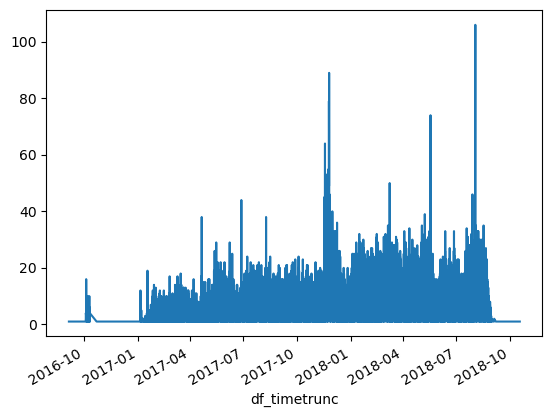

In [142]:
df_join['df_timetrunc'] = df_join["order_purchase_timestamp"].dt.floor('h')
df_join.groupby('df_timetrunc')["order_id"].count().plot(kind='line')

In [138]:
y = df_join.groupby('df_timetrunc')["order_id"].count().values
x = df_join.groupby('df_timetrunc')["order_id"].count().index